In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# --- 1. Load Dataset ---

In [2]:
df = sns.load_dataset("titanic").dropna(subset=["age","fare","sex","class"])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# --- 2. Central Tendency & Spread ---

In [3]:
print("\n--- Central Tendency ---")
print("Mean Age:",df["age"].mean())
print("Median Age",df["age"].median())
print("Mode Age",df["age"].mode()[0])


--- Central Tendency ---
Mean Age: 29.69911764705882
Median Age 28.0
Mode Age 24.0


In [4]:
print("\n--- Spread ---")
print("Variance Age:",df["age"].var())
print("Standard Deviation Age:",df["age"].std())
print("Range Age",df["age"].max() - df["age"].min())


--- Spread ---
Variance Age: 211.0191247463081
Standard Deviation Age: 14.526497332334044
Range Age 79.58


# --- 3. Distribution & Normality ---

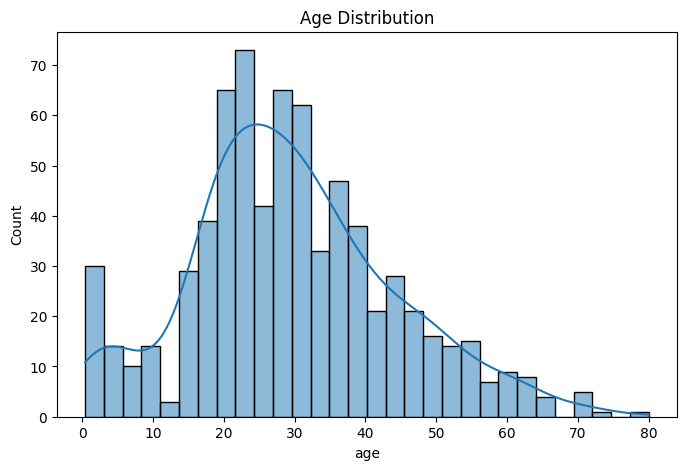

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"],kde=True,bins=30)
plt.title("Age Distribution")
plt.show()

In [6]:
stat, p = stats.shapiro(df["age"].dropna())
print("\nShapiro-Wilk Test (Normality)")
print("Statistic:", stat, " P-value:", p)
if p < 0.05:
    print("Reject H0: Data not normal")
else:
    print("Fail to reject H0: Data looks normal")


Shapiro-Wilk Test (Normality)
Statistic: 0.9814577414504954  P-value: 7.337348958673594e-08
Reject H0: Data not normal


# --- 4. Hypothesis Test ---

In [7]:
male_fares = df[df["sex"]=="male"]["fare"]
female_fares = df[df["sex"]=="female"]["fare"]

t_stat, p_val = stats.ttest_ind(male_fares, female_fares)

print("\n--- Hypothesis Test: Male vs Female Fares ---")
print("T-statistic:", t_stat)
print("P-value:", p_val)
if p_val < 0.05:
    print("Reject Null Hypothesis: Significant difference in fares")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in fares")


--- Hypothesis Test: Male vs Female Fares ---
T-statistic: -5.022960682752043
P-value: 6.439279020446988e-07
Reject Null Hypothesis: Significant difference in fares


# --- 5. Extra: ANOVA Example (Class-wise Age) ---


In [8]:
f_stat, p_val = stats.f_oneway(
    df[df["class"]=="First"]["age"],
    df[df["class"]=="Second"]["age"],
    df[df["class"]=="Third"]["age"]
)

In [9]:
print("\n--- ANOVA: Age across Classes ---")
print("F-statistic:", f_stat, " P-value:", p_val)
if p_val < 0.05:
    print("Reject H0: At least one class has different mean age")
else:
    print("Fail to reject H0: No difference in mean ages")


--- ANOVA: Age across Classes ---
F-statistic: 57.44348434067624  P-value: 7.487984171959213e-24
Reject H0: At least one class has different mean age
